In [1]:
# Mecanum Robot의 속도 계산 프로그램

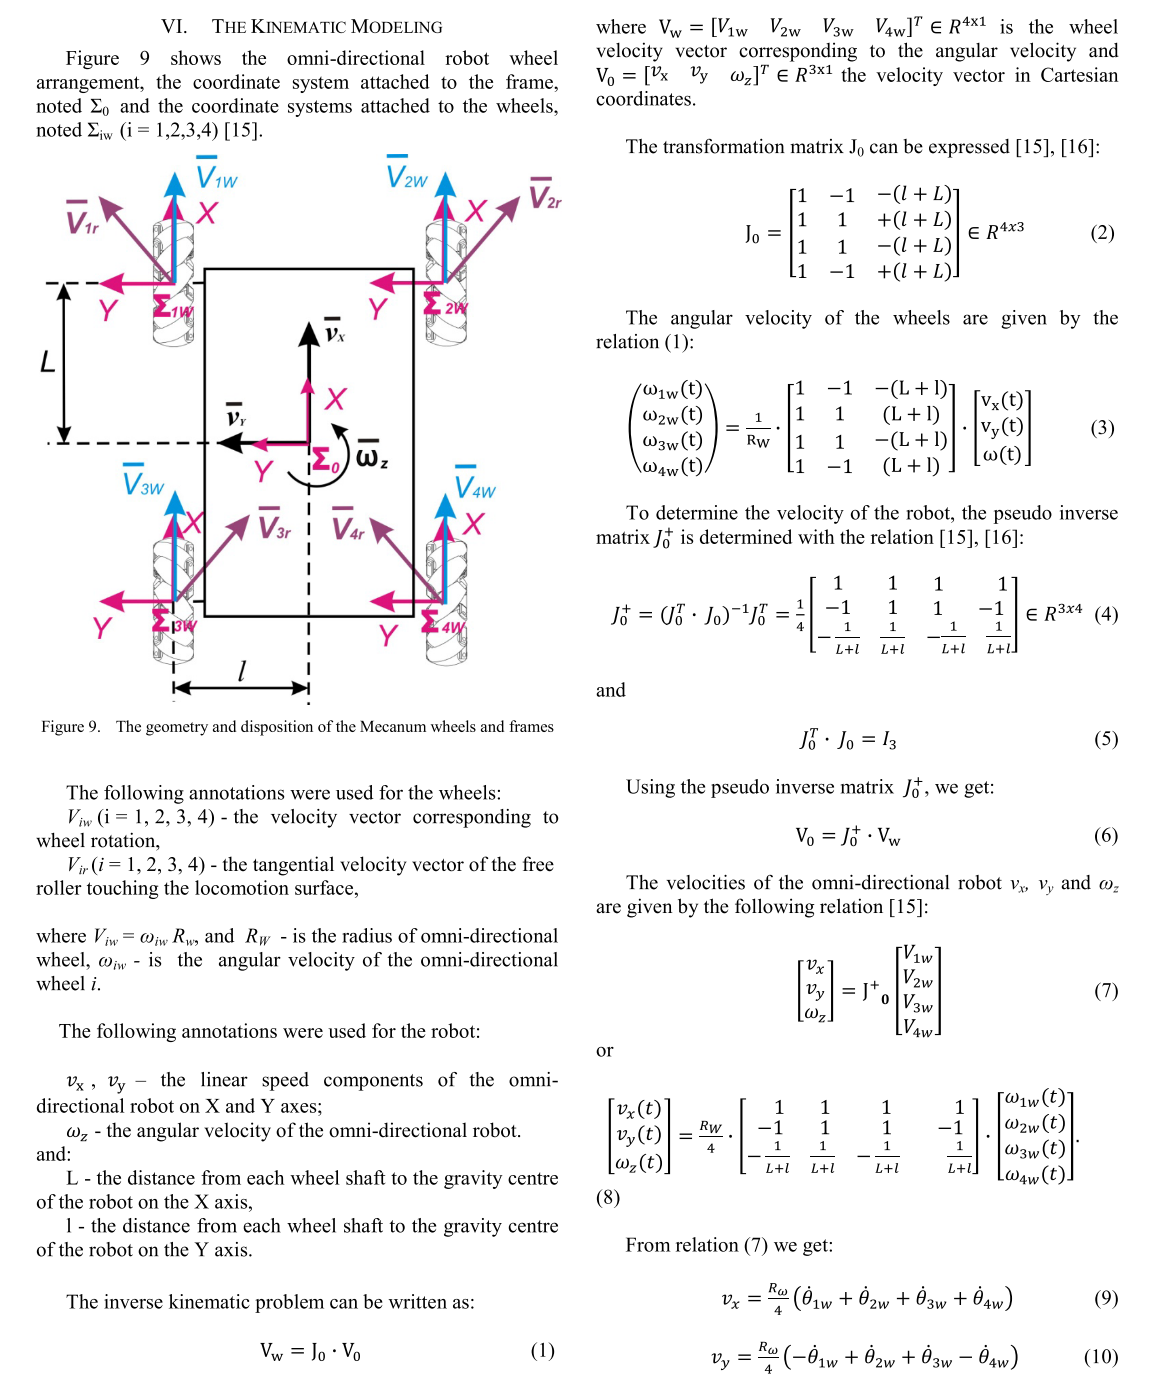

In [2]:
# Design and Development of an Aut onomous Directional Mobile Rob bot with h Mecanum Wheels
# Olimpiu, Mihai, Mândru, Dan, Ardelean, Ioan, Ple, Alin
from IPython.display import Image
Image('mecanum_vel.PNG', width=800)

In [19]:
import math
import numpy

In [79]:
Wheel_Dia_Inch = 6 # inch
Mecanum_L = 0.15
Mecanum_l = 0.135
Motor_Kv = 330     # Kv = RPM/Volt (Tarot 4008:330kv)
Gear_Ratio = 14
Volt = 36          # Volt
Payload = 30       # kg
Accel = 0.5        # g

In [80]:
RPM2RPS = 2*math.pi/60
RPS2DEG = 180/math.pi
INCH2M = 0.0254
MPS2KMH = 3.6
alpha = Mecanum_L + Mecanum_l

In [81]:
Wheel_radius = Wheel_Dia_Inch*INCH2M/2
Motor_Kv_rps_per_volt = Motor_Kv*RPM2RPS        # (rad/sec)/Volt
Motor_Kv_volt_per_rps = 1/Motor_Kv_rps_per_volt # Volt/(rad/sec)
Motor_Kt = Motor_Kv_volt_per_rps # Nm/A

In [82]:
# Torque Constant - Nm/A
Motor_Kt

0.028937262380344612

In [83]:
w_max_rps = Volt*Motor_Kv_rps_per_volt/Gear_Ratio

In [84]:
w_max_deg = w_max_rps*RPS2DEG

In [85]:
w_max_rpm = w_max_rps/RPM2RPS

In [86]:
w_max_rps

88.86219220153986

In [87]:
w_max_deg

5091.428571428571

In [88]:
Wheel_radius*w_max_rps*MPS2KMH  # speed [km/h] of single wheel

24.37667656472641

In [89]:
Jacobian = Wheel_radius/4*numpy.array([[1,1,1,1],[-1,1,1,-1],[-1/alpha,1/alpha,-1/alpha,1/alpha]])

In [90]:
Jacobian

array([[ 0.01905   ,  0.01905   ,  0.01905   ,  0.01905   ],
       [-0.01905   ,  0.01905   ,  0.01905   , -0.01905   ],
       [-0.06684211,  0.06684211, -0.06684211,  0.06684211]])

In [91]:
Wheel_speed_rps_forward = w_max_rps*numpy.array([[1],[1],[1],[1]])
Wheel_speed_rps_lateral = w_max_rps*numpy.array([[-1],[1],[1],[-1]])
Wheel_speed_rps_rotation = w_max_rps*numpy.array([[-1],[1],[-1],[1]])

In [92]:
# Forward Velocity - km/h
Jacobian@Wheel_speed_rps_forward*MPS2KMH 

array([[24.37667656],
       [ 0.        ],
       [ 0.        ]])

In [93]:
# Lateral Velocity - km/h
Jacobian@Wheel_speed_rps_lateral*MPS2KMH 

array([[ 0.        ],
       [24.37667656],
       [ 0.        ]])

In [94]:
# Rotation Velocity - deg/sec
Jacobian@Wheel_speed_rps_rotation*RPS2DEG 

array([[   0.        ],
       [   0.        ],
       [1361.28721805]])

In [95]:
# Torque required for acceleration with payload - Nm
Torque_required = Accel*9.81*Payload/4*Wheel_radius

In [96]:
# Amphere for one motor
Torque_required/Motor_Kt/Gear_Ratio

6.919421212383277